# SVM Vs Linear Regression
1. pengerjaan membuat code menggunakan AI, code dari github sebagai referensi fiture fiture dan dataset saja<br>
2. penambahan fiture pengecekan data
3. penambahan fiture evaluasi hasil MSE
4. menambahkan SVM Classification with Different Kernels
5. menambahkan fiture Komparasi perfomance

[https://github.com/kb22/Heart-Disease-Prediction/tree/master] (referensi untuk dataset menggunakan ini)<br>
[https://github.com/rohansikder/SVM-Vs-Logistic-Regression-Vs-kNN] (referensi untuk fiture fiture)<br>
[https://chatgpt.com/share/67370d19-fd04-8005-af5e-a4f6bfe2345b]
[https://chatgpt.com/c/6736f931-fd5c-8010-8135-24f3c75e4317] (referensi untuk pembuatan code menggunakan AI)

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix

<h2>Importing Dataset</h2>


In [86]:

# Load dataset
data = pd.read_csv('dataset.csv')

<h2>Cleaning Data</h2>
<b>mengecek data jika ada data yang duplikat<b>

In [87]:
# Data cleaning and preprocessing
# pemeriksaan jika ada data yang hilang
print("Missing values in each column:")
print(data.isnull().sum())

# Mengisi atau menghapus nilai yang hilang (contoh: menghapus baris dengan nilai yang hilang)
data = data.dropna()

# Mengkodekan variabel kategori 
data['sex'] = data['sex'].astype('category').cat.codes
data['restecg'] = data['restecg'].astype('category').cat.codes

# Check data duplikat
data = data.drop_duplicates()

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [88]:
# Tentukan variabel independen (fitur) dan variabel dependen (target)
X = data[['sex', 'age', 'chol', 'trestbps', 'restecg']]
y = data['target']

# Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Model 2: Support Vector Machine (SVM)
svm_model = SVR(kernel='rbf')  # Using radial basis function (RBF) kernel
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Evaluasi: Mean Squared Error
lr_mse = mean_squared_error(y_test, lr_pred)
svm_mse = mean_squared_error(y_test, svm_pred)

# print hasil MSE
print(f"Linear Regression MSE: {lr_mse:.4f}")
print(f"SVM MSE: {svm_mse:.4f}")


Linear Regression MSE: 0.2149
SVM MSE: 0.2573


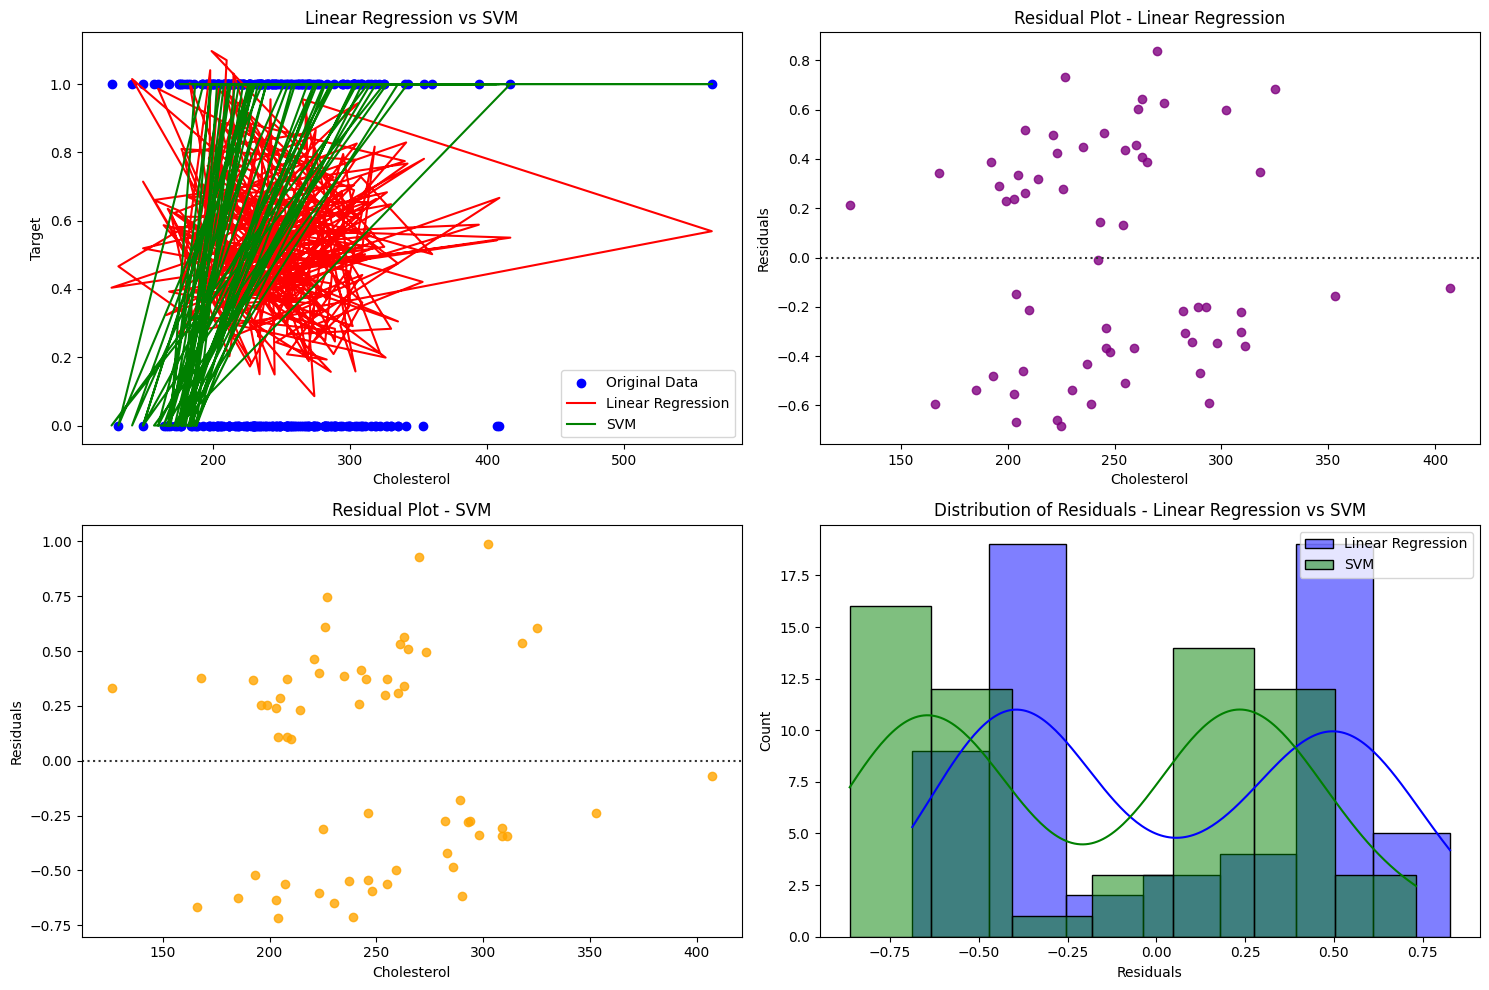

In [84]:

# Visualization
plt.figure(figsize=(15, 10))

# Scatter Plot Linear Regression vs SVM
plt.subplot(2, 2, 1)
plt.scatter(X['chol'], y, color="blue", label="Original Data")
plt.plot(X['chol'], lr_model.predict(X), color="red", label="Linear Regression")
plt.plot(X['chol'], svm_model.predict(X), color="green", label="SVM")
plt.title("Linear Regression vs SVM")
plt.xlabel("Cholesterol")
plt.ylabel("Target")
plt.legend()

# Residual Plot for Linear Regression
plt.subplot(2, 2, 2)
sns.residplot(x=X_test['chol'], y=(y_test - lr_pred), color="purple")
plt.title("Residual Plot - Linear Regression")
plt.xlabel("Cholesterol")
plt.ylabel("Residuals")

# Residual Plot for SVM
plt.subplot(2, 2, 3)
sns.residplot(x=X_test['chol'], y=(y_test - svm_pred), color="orange")
plt.title("Residual Plot - SVM")
plt.xlabel("Cholesterol")
plt.ylabel("Residuals")

# Distribution of Residuals for Linear Regression vs SVM
plt.subplot(2, 2, 4)
sns.histplot((y_test - lr_pred), kde=True, color="blue", label="Linear Regression", alpha=0.5)
sns.histplot((y_test - svm_pred), kde=True, color="green", label="SVM", alpha=0.5)
plt.title("Distribution of Residuals - Linear Regression vs SVM")
plt.xlabel("Residuals")
plt.legend()

plt.tight_layout()
plt.show()

1. scatter plot dengan garis regresi (Kiri atas)
- Grafik disini terdapat titik biru sebagai data asli dengan variabel independen kolestrol (X-axis) dan varriabel dependen Target (Y-axis)
- Garis merah menunjukan prediksi dari metode Linear Regresion
- Garis hijau menunjukan prediksi dari metode SVM
- Dari pola garis model Linear Regresion dengan garis lurus mencoba menyesuaikan data secara linear.
- sedangkan model svm dengan kernel RBF mencoba untuk mengikuti pola pola linear data
- model SVM terlihat lebih menyesuaikan data dari pada Linear Regresion
2. Resudal Plot - Linear Regresion (Kanan Atas)
- Grafik ini menunjukan Residual Plot untuk model Linear Regresion, menggambarkan perbedaan nilai antara nilai aktual dan prediksi model (residuals)
- titik titik residual tersebar tidak beraturan di garis horizontal pada nilai residual 0
- ada beberapa outliers yang jauh dari garis nol
membuktikan bahwa metode Linear Regresion tidak selalu akurat
3. Residual Plot - SVM (Kiri Bawah)
- Grafik ini menunjukan Residual Plot untuk Model SVM.
- Secara umum, titik residual tersebar lebih rapat di sekitar garis 0 dibagikan dengan Linear Regresion. yang menandakan bahwa model SVM lebih akurat pada data ini
- sebaran residual lebih simetris dan tidak memiliki outliers yang ekstrem, menunjukan bahwa SVM dapa menyesuaikan pola data dengan lebih baik
4. Distribusi Residual - Linear Regresion vs SVM (Kanan Bawah)
- Grafik ini menunjukan histogram dari residual uuntk kedua model, dengan warna biru untuk Linear Regresion dan Warna Hijau untuk SVM
- Distribusi residual Linear Regresion tanpak memiliki variasi yang lebih besar dan leebih menyebar. ini berarti Linear Regresion menghasilkan lebih banyak prediksi dengan kesalahan yang signifikan

In [79]:

# SVM Classification with Different Kernels
from sklearn.svm import SVC
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for kernel in kernels:
    print(f"Evaluating SVM with {kernel} kernel")
    
    # Initialize the SVM model with balanced class weights and the current kernel
    svm_model = SVC(kernel=kernel, class_weight='balanced')
    
    # Train the model
    svm_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_svm = svm_model.predict(X_test)
    
    # Classification report
    print(classification_report(y_test, y_pred_svm))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred_svm)
    print(conf_matrix)
    print("---------------------------------------------------------")


Evaluating SVM with linear kernel
              precision    recall  f1-score   support

           0       0.53      0.90      0.67        29
           1       0.75      0.28      0.41        32

    accuracy                           0.57        61
   macro avg       0.64      0.59      0.54        61
weighted avg       0.65      0.57      0.53        61

[[26  3]
 [23  9]]
---------------------------------------------------------
Evaluating SVM with rbf kernel
              precision    recall  f1-score   support

           0       0.63      0.59      0.61        29
           1       0.65      0.69      0.67        32

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61

[[17 12]
 [10 22]]
---------------------------------------------------------
Evaluating SVM with poly kernel
              precision    recall  f1-score   support

           0       0.68      0.52      0

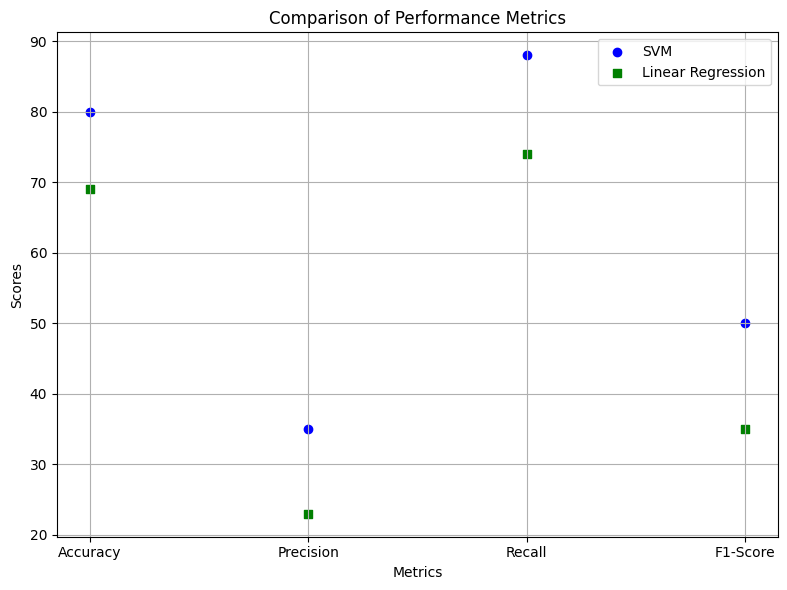

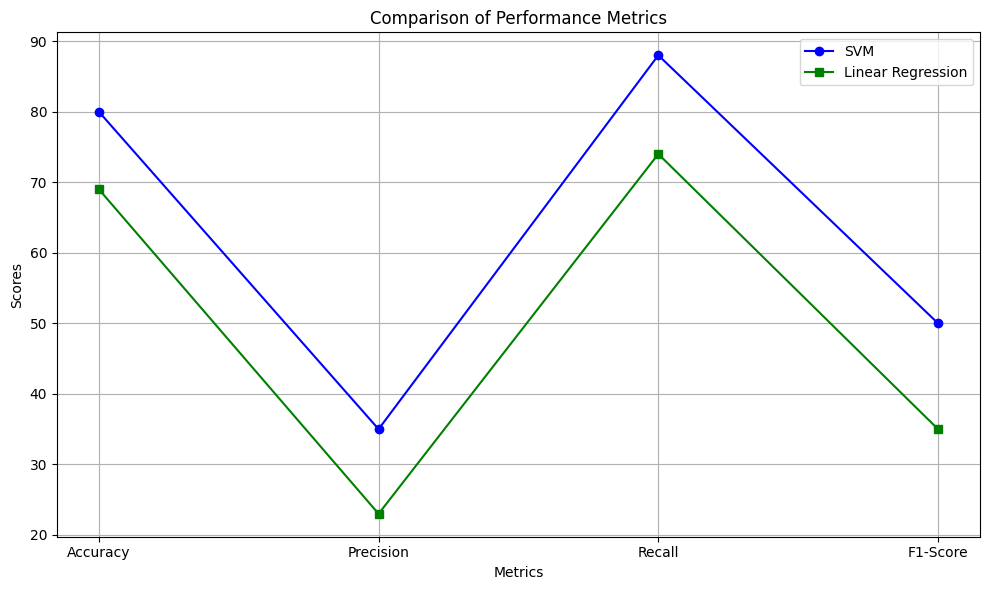

In [80]:

# Data for performance comparison chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
svm_scores = [80, 35, 88, 50]
lr_scores = [69, 23, 74, 35]  # Updated to reflect Linear Regression scores

# Scatter plot with different markers
plt.figure(figsize=(8, 6))
plt.scatter(metrics, svm_scores, marker='o', label='SVM', color='blue')
plt.scatter(metrics, lr_scores, marker='s', label='Linear Regression', color='green')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Performance Metrics')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Line chart comparison
plt.figure(figsize=(10, 6))
plt.plot(metrics, svm_scores, marker='o', label='SVM', color='blue')
plt.plot(metrics, lr_scores, marker='s', label='Linear Regression', color='green')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Performance Metrics')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Berikut penjelasan dari 2 gambar matriks 

1. Akurasi 
- Model SVM memiliki akurasi yang lbih tinggi dibandingkan Regresi Linear
2. Presisi
- Regresi Linear memiliki akurasi yang sangat rendah dibandingkan dengan SVM
3. Recall 
- recall dari model SVM lebih tinggi dibandingkan Linear Regresi membuktikan bahwa SVM mendeteksi positif sebenarnya
4. F1-score 
- Model SVM sama halnya sebelumnya 